In [2]:
import pandas as pd
import numpy as np
import csv
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import string
from io import StringIO
import re
import pprint
from string import punctuation

In [3]:
#Open the labelled dataset

with open('opioids0504.csv', 'rb') as f:
  contents = f.read()

s = str(contents, 'utf-8', errors="ignore")
data = StringIO(s)
df=pd.read_csv(data)

df.head()

Unnamed: 0 article_timestamp class  compound     date_scraped  \
0           0    3/12/2019 8:18     D    0.1018          45:07.5   
1           1    3/22/2019 4:26     A    0.9951          36:36.7   
2           2    3/21/2019 0:02     A    0.9605          01:04.5   
3           3   3/19/2019 14:12     A    0.9965          01:04.5   
4           4   3/26/2019 14:20     B    0.6024  3/26/2019 21:33   

                                            full_url  index_num    neg    neu  \
0  /health/health-news/nih-cancer-chief-serve-act...        1.0  0.044  0.895   
1  /health/health-news/aspiring-doctors-seek-adva...        5.0  0.027  0.885   
2  https://www.npr.org/sections/health-shots/2019...       24.0  0.051  0.872   
3  https://www.npr.org/sections/health-shots/2019...       31.0  0.020  0.884   
4  https://www.npr.org/sections/health-shots/2019...       44.0  0.083  0.824   

     pos publication_type                                               text  \
0  0.061           Outlet  The head of the National Cancer Institute will...   
1  0.089           Outlet  Yet, by all accounts, there aren۪t nearly enou...   
2  0.077           Outlet  Men are dying after opioid overdoses at nearly...   
3  0.096           Outlet  Yet, by all accounts, there aren't nearly enou...   
4  0.092           Outlet  Updated at 3:20 p.m.,The first of more than 1,...   

   text_length                                              title  \
0       2411.0  NIH cancer chief to serve as acting FDA commis...   
1       6331.0  Aspiring doctors seek advanced training in add...   
2       5416.0  Steep Rise In Fentanyl-Linked Deaths Marks Opi...   
3       6129.0  Addiction Medicine Lures A New Generation Of I...   
4       2518.0  Purdue Pharma Settles Opioid Lawsuit In Oklaho...   

   title_length  url_id website_name  
0          52.0     7.0     NBC News  
1          61.0     7.0     NBC News  
2          99.0     8.0          NPR  
3          91.0     8.0          NPR  
4          76.0     8.0          NPR

In [4]:
# Add the extra Class C articles (hand-selected to address imbalance in target classes)

with open('opioid_policy_articles.csv', 'rb') as f:
  contents = f.read()

s = str(contents, 'utf-8', errors="ignore")
data = StringIO(s)
dfC=pd.read_csv(data)

dfC['class'] = 'C'
dfC

title  \
0  The Opioid Dilemma: Saving Lives in the Long R...   
1  Months after mayors plan, key D.C. opioid prog...   
2          White House rolls out policies on opioids   
3  White House prioritizes opioid abuse in first ...   
4  CDC launches campaign to help states fight pre...   

                                                text  \
0  The unavoidable tension in attacking the opioi...   
1  More than two months after D.C. Mayor Muriel E...   
2  During a surprise appearance at a March 1 Whit...   
3  Washington (CNN)The White House Office of Nati...   
4  Today the Centers for Disease Control and Prev...   

                                            full_url  date_scraped  \
0  https://www.nytimes.com/2019/03/04/upshot/opio...           NaN   
1  https://www.washingtonpost.com/local/dc-politi...           NaN   
2  https://www.pharmacytoday.org/article/S1042-09...           NaN   
3  https://www.cnn.com/2019/01/31/politics/white-...           NaN   
4  https://www.cdc.gov/media/releases/2017/p0925-...           NaN   

   article_timestamp  compound  neg  neu  pos  title_length  text_length  \
0                NaN       NaN  NaN  NaN  NaN           NaN          NaN   
1                NaN       NaN  NaN  NaN  NaN           NaN          NaN   
2                NaN       NaN  NaN  NaN  NaN           NaN          NaN   
3                NaN       NaN  NaN  NaN  NaN           NaN          NaN   
4                NaN       NaN  NaN  NaN  NaN           NaN          NaN   

   url_id  website_name  publication_type  index_num class  
0     NaN           NaN               NaN        NaN     C  
1     NaN           NaN               NaN        NaN     C  
2     NaN           NaN               NaN        NaN     C  
3     NaN           NaN               NaN        NaN     C  
4     NaN           NaN               NaN        NaN     C

In [5]:
df = pd.concat([df, dfC])
df.tail()

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


Unnamed: 0 article_timestamp class  compound date_scraped  \
0         NaN               NaN     C       NaN          NaN   
1         NaN               NaN     C       NaN          NaN   
2         NaN               NaN     C       NaN          NaN   
3         NaN               NaN     C       NaN          NaN   
4         NaN               NaN     C       NaN          NaN   

                                            full_url  index_num  neg  neu  \
0  https://www.nytimes.com/2019/03/04/upshot/opio...        NaN  NaN  NaN   
1  https://www.washingtonpost.com/local/dc-politi...        NaN  NaN  NaN   
2  https://www.pharmacytoday.org/article/S1042-09...        NaN  NaN  NaN   
3  https://www.cnn.com/2019/01/31/politics/white-...        NaN  NaN  NaN   
4  https://www.cdc.gov/media/releases/2017/p0925-...        NaN  NaN  NaN   

   pos publication_type                                               text  \
0  NaN              NaN  The unavoidable tension in attacking the opioi...   
1  NaN              NaN  More than two months after D.C. Mayor Muriel E...   
2  NaN              NaN  During a surprise appearance at a March 1 Whit...   
3  NaN              NaN  Washington (CNN)The White House Office of Nati...   
4  NaN              NaN  Today the Centers for Disease Control and Prev...   

   text_length                                              title  \
0          NaN  The Opioid Dilemma: Saving Lives in the Long R...   
1          NaN  Months after mayors plan, key D.C. opioid prog...   
2          NaN          White House rolls out policies on opioids   
3          NaN  White House prioritizes opioid abuse in first ...   
4          NaN  CDC launches campaign to help states fight pre...   

   title_length  url_id website_name  
0           NaN     NaN          NaN  
1           NaN     NaN          NaN  
2           NaN     NaN          NaN  
3           NaN     NaN          NaN  
4           NaN     NaN          NaN

In [7]:
#Find the distribution of rating classifications in the dataset
df['class'].value_counts()

B    37
D    26
A    22
C    20
Name: class, dtype: int64

In [8]:
#Make a dataframe to easily access count values
counts = pd.DataFrame(df['class'].value_counts())
counts

class
B     37
D     26
A     22
C     20

In [9]:
# Reset the index, so that class lables are in a column
counts.reset_index(inplace = True) 
counts.rename(columns={"index": "topic_class", "class": "article_count"})
counts = counts.rename(columns={"index": "topic_class", "class": "article_count"})
counts

topic_class  article_count
0           B             37
1           D             26
2           A             22
3           C             20

In [10]:
#Find class with highest frequency -- for null accuracy calculation
count_max = counts['article_count'].max()
count_max

37

In [11]:
#Find sum of class frequencies -- for null accuracy denominator
count_all = counts['article_count'].sum()
count_all

105

In [12]:
#Calculate null accuracy: ie. accuracy that could be achieved by always predicting the most frequent class
null_accuracy = 100*(float(count_max)/count_all)
print('Null Accuracy: %.2f%%' % (null_accuracy))

Null Accuracy: 35.24%


In [13]:
# Add a column to the dataset that gives a qualitative descriptor for each class
# A = Opioid_Epidemic
# B = Prescribers_Distributors_Manufacturers
# C = Policy_Regulation
# D = Unrelated

df['topic'] = 'Unrelated'

df['topic'] = np.where(df['class'] == 'A', 'Opioid_Epidemic', df['topic'])
df['topic'] = np.where(df['class'] == 'B', 'Industry/Rx_factors', df['topic'])
df['topic'] = np.where(df['class'] == 'C', 'Policy_Regulation', df['topic'])

df = df[['text', 'class', 'topic']]

df.head(20)

text class  \
0   The head of the National Cancer Institute will...     D   
1   Yet, by all accounts, there aren۪t nearly enou...     A   
2   Men are dying after opioid overdoses at nearly...     A   
3   Yet, by all accounts, there aren't nearly enou...     A   
4   Updated at 3:20 p.m.,The first of more than 1,...     B   
5   Donated organs from people who were infected w...     D   
6   Pot brownies and other cannabis edibles۝ like ...     D   
7   In Paris, at the Louvre, lovers of Persian art...     B   
8   Synthetic opioids  drugs far more potent than ...     B   
9   Purdue Pharma, the maker of OxyContin, and its...     B   
10  A coalition of states is appealing the ruling....     D   
11  Purdue Pharma, the maker of OxyContin, and its...     B   
12  As investigators closed in on Purdue Pharma, t...     B   
13  The Sacklers had a new plan.,Details of the ef...     B   
14  Purdue Pharma۪s sales force swept through New ...     B   
15  CBS News met a young man named Jacob who says ...     A   
16  The pharmaceutical company, based in Stamford,...     B   
17  With CBD showing up everywhere, U.S. regulator...     D   
18  In May 2016, a group of national health expert...     C   
19  Your grandparents۪ chronic aches and pains mig...     A   

                  topic  
0             Unrelated  
1       Opioid_Epidemic  
2       Opioid_Epidemic  
3       Opioid_Epidemic  
4   Industry/Rx_factors  
5             Unrelated  
6             Unrelated  
7   Industry/Rx_factors  
8   Industry/Rx_factors  
9   Industry/Rx_factors  
10            Unrelated  
11  Industry/Rx_factors  
12  Industry/Rx_factors  
13  Industry/Rx_factors  
14  Industry/Rx_factors  
15      Opioid_Epidemic  
16  Industry/Rx_factors  
17            Unrelated  
18    Policy_Regulation  
19      Opioid_Epidemic

In [14]:
# Drop any rows that do not have text data, or a class assigned
df = df.dropna(subset=['class', 'text'])
df.shape

(105, 3)

In [15]:
# Most machine learning tutorials recommend factorizing a categorical target -- eg, convert to integer

df['class_id'] = df['topic'].factorize()[0]
class_id_df = df[['topic', 'class_id']].drop_duplicates().sort_values('class_id')
class_to_id = dict(class_id_df.values)
id_to_class = dict(class_id_df[['class_id', 'topic']].values)
df.head(10)

text class  \
0  The head of the National Cancer Institute will...     D   
1  Yet, by all accounts, there aren۪t nearly enou...     A   
2  Men are dying after opioid overdoses at nearly...     A   
3  Yet, by all accounts, there aren't nearly enou...     A   
4  Updated at 3:20 p.m.,The first of more than 1,...     B   
5  Donated organs from people who were infected w...     D   
6  Pot brownies and other cannabis edibles۝ like ...     D   
7  In Paris, at the Louvre, lovers of Persian art...     B   
8  Synthetic opioids  drugs far more potent than ...     B   
9  Purdue Pharma, the maker of OxyContin, and its...     B   

                 topic  class_id  
0            Unrelated         0  
1      Opioid_Epidemic         1  
2      Opioid_Epidemic         1  
3      Opioid_Epidemic         1  
4  Industry/Rx_factors         2  
5            Unrelated         0  
6            Unrelated         0  
7  Industry/Rx_factors         2  
8  Industry/Rx_factors         2  
9  Industry/Rx_factors         2

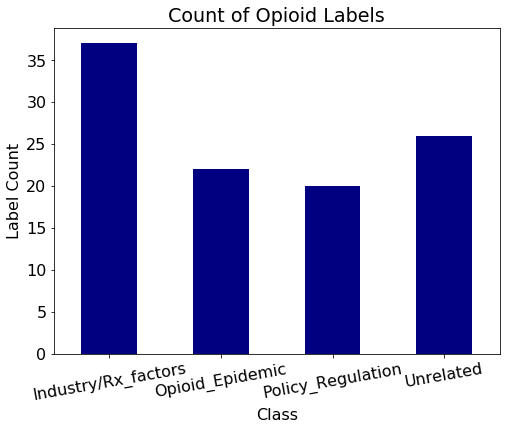

In [17]:
# show distribution of classes with a bar chart
plt.rcParams.update({'font.size': 16})
fig = plt.figure(figsize=(8,6))
d = df.groupby('topic').text.count().plot.bar(ylim=0, color = "navy")
plt.xticks(rotation=10)
d.set_title("Count of Opioid Labels")
d.set_ylabel("Label Count")
d.set_xlabel("Class")
plt.savefig('Class_Dist.png')
plt.show()

In [18]:
# Classes are somewhat imbalanced toward class B. We would/should undersample class B, but as it stands
# with only 10+ observations, we probably can't afford to lose any in training set

df.shape

(105, 4)

In [19]:
# Vectorize each article (1,2, or 3-word features, words must appear in at least 5 documents to be included)
# Tfidf weights each term according to frequency within the document and inverse frequency in corpus of all documents
# sublinear_tf = True for logarithmic form for frequency (? suggested)
# norm = '12'  so that feature vectors have a euclidian norm of 1 (? I think this refers to regularization)

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 3), stop_words='english')
features = tfidf.fit_transform(df.text).toarray()
labels = df.class_id
features.shape



(105, 1955)

In [20]:
# So, we have 1955 features for our model. We can find and view which features are most correlated with each article class

from sklearn.feature_selection import chi2
import numpy as np
N = 2

for topic, class_id in sorted(class_to_id.items()):
  features_chi2 = chi2(features, labels == class_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(topic))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))



# 'Industry/Rx_factors':
  . Most correlated unigrams:
. purdue
. sackler
  . Most correlated bigrams:
. sackler family
. purdue pharma
# 'Opioid_Epidemic':
  . Most correlated unigrams:
. cocaine
. kratom
  . Most correlated bigrams:
. addiction medicine
. overdose deaths
# 'Policy_Regulation':
  . Most correlated unigrams:
. administration
. trump
  . Most correlated bigrams:
. donald trump
. white house
# 'Unrelated':
  . Most correlated unigrams:
. cannabis
. foods
  . Most correlated bigrams:
. emergency room
. new jersey


In [33]:
# The above unigrams and bigrams align with what we would expect for article classes. However, the model
# will need to be frequently re-trained, since topics depend on news cycle (eg, the 'Industry/RX' class 
# might not always contain articles about purdue pharma) 
# 
# could try to do feature selection down to fewer features
# could try to engineer some other factors. 
# BUT, Just going to proceed as-is for now


In [34]:
# Perform cross-validation first, to judge model performance
# Cross-validation splits the entire dataset into a specified number of folds, then trains on each fold. The range of accuracies gives
# a better idea of how the model will generalize to unknown data, compared with just one train-test split.

from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

models = [MultinomialNB(), LinearSVC(), LogisticRegression(random_state=0), 
          RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)]

#Assign 8 cross validation folds
CV = 8


entries = []

for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_num, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_num, accuracy))
cv_df = pd.DataFrame(entries, columns = ['model_name', 'fold_number', 'accuracy'])



/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default so

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

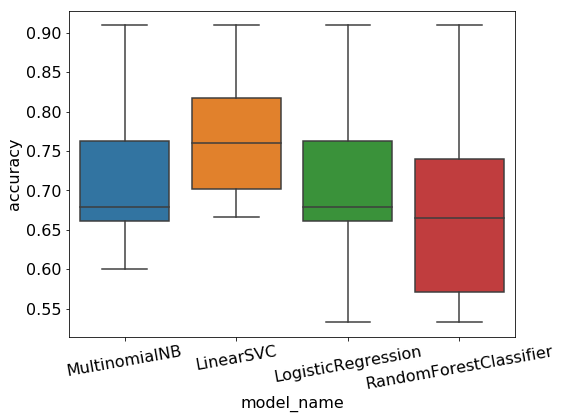

In [35]:
# Visualize range of accuracies over each fold, for each model, as a boxplot 
fig = plt.figure(figsize=(8,6))
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
plt.xticks(rotation=10)


In [36]:
# Although all models showed a range of accuracies (approx 10% or higher spread Q1-Q3), LinearSVC had the highest median 
# accuracy, and narrowest overall range, including outliers, so would be considered best candidate model.
# For the sake of exploration, we would like to investigate each model, by ploting a heat map to show where
# the correct and incorrect predictions fall

In [37]:
#Split the dataset into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'], 
                                                    df['class_id'], 
                                                    random_state=0, test_size=0.30)

In [38]:
# Vectorize input again, prior experiments with count vectorizer vs tfidf vectorizer
# have shown that tfidf leads to better model accuracy. 
# FIRST MODEL = multinomial Naive Bayes

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 3), stop_words='english')
#tfidf = TfidfVectorizer(min_df=6, norm='l2', ngram_range=(1, 3), stop_words='english')

vect = tfidf.fit(X_train)
X_train_vectorized = vect.transform(X_train)
clf = MultinomialNB().fit(X_train_vectorized, y_train)


In [39]:
#set the coloring 
pal = sns.dark_palette((260, 75, 60), input="husl")

Model Accuracy: 78.12%


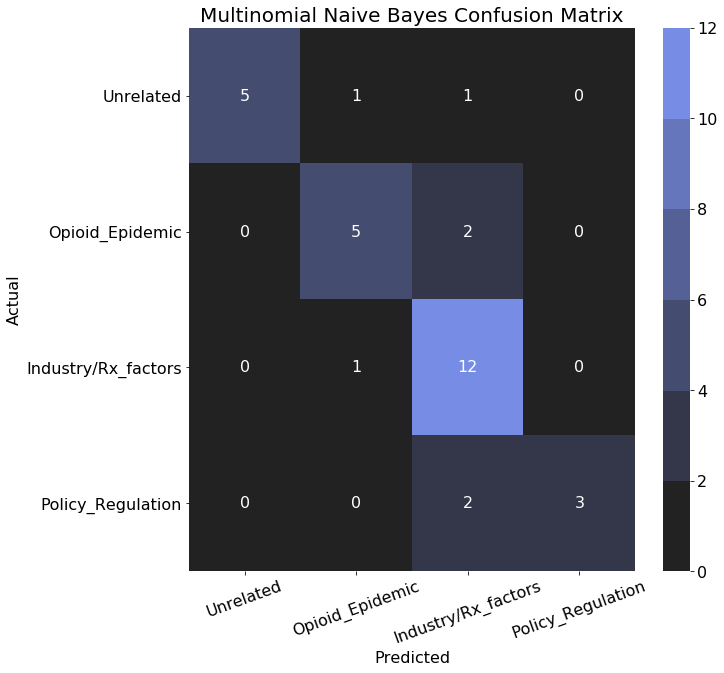

In [40]:

# Make predictions on the test set, then calculate accuracy of MULTI-NB. Generate heat map of predictions


from sklearn.metrics import accuracy_score

y_pred = clf.predict(vect.transform(X_test))
print('Model Accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100))


from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=class_id_df.topic.values, yticklabels=class_id_df.topic.values, cmap = pal)
plt.title("Multinomial Naive Bayes Confusion Matrix", fontsize = 20)
plt.rcParams.update({'font.size': 16})
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.xticks(rotation=20)
plt.savefig('multi-NB.png')
plt.show()

Model Accuracy: 81.25%


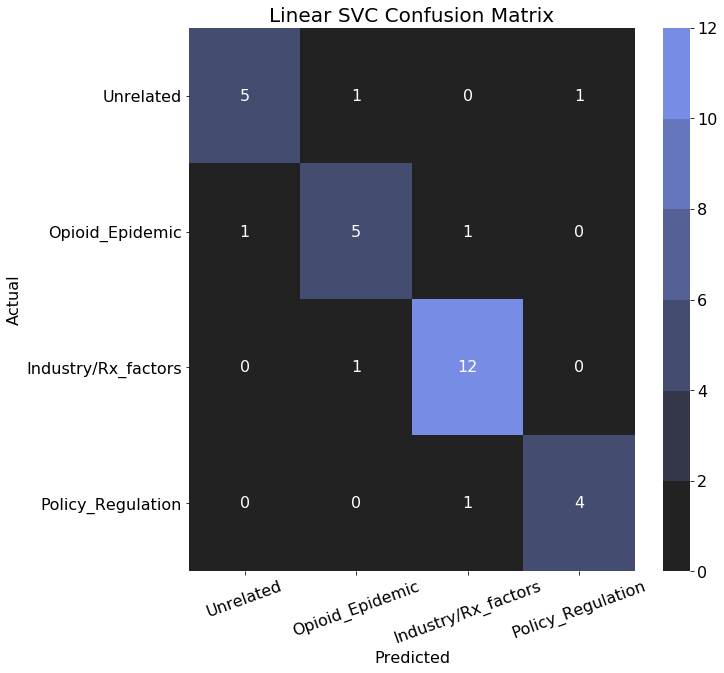

In [45]:
# Try other models, using same feature set

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression


model1 = LinearSVC()

model1.fit(X_train_vectorized, y_train)
y_pred = model1.predict(vect.transform(X_test))
print('Model Accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100))

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=class_id_df.topic.values, yticklabels=class_id_df.topic.values, cmap = pal)

plt.rcParams.update({'font.size': 16})
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Linear SVC Confusion Matrix", fontsize = 20)
plt.xticks(rotation=20)
plt.savefig('SVC.png')
plt.show()


/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Model Accuracy: 78.12%


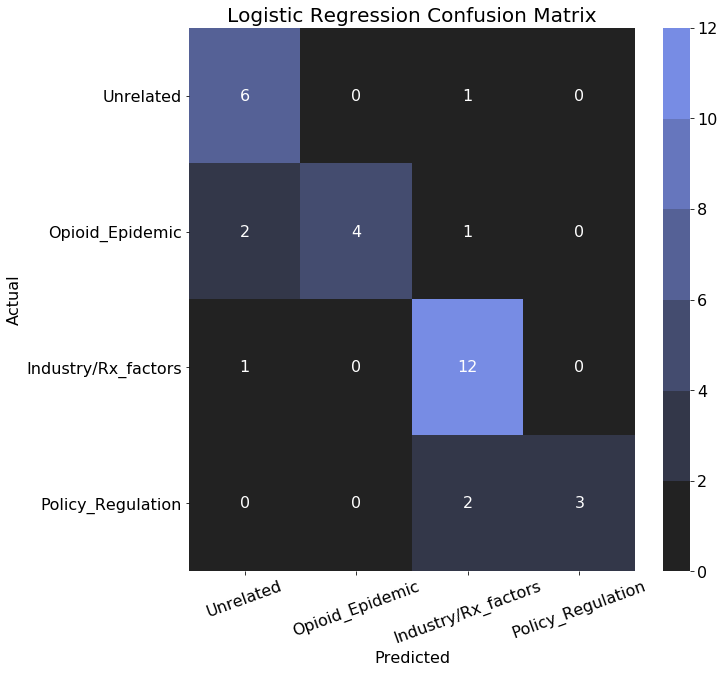

In [46]:
# Try other models

model2 = LogisticRegression(random_state=0)

model2.fit(X_train_vectorized, y_train)
y_pred = model2.predict(vect.transform(X_test))
print('Model Accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100))

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=class_id_df.topic.values, yticklabels=class_id_df.topic.values, cmap = pal)

plt.rcParams.update({'font.size': 16})
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Logistic Regression Confusion Matrix", fontsize = 20)
plt.xticks(rotation=20)
plt.savefig('LogReg.png')
plt.show()

Model Accuracy: 68.75%


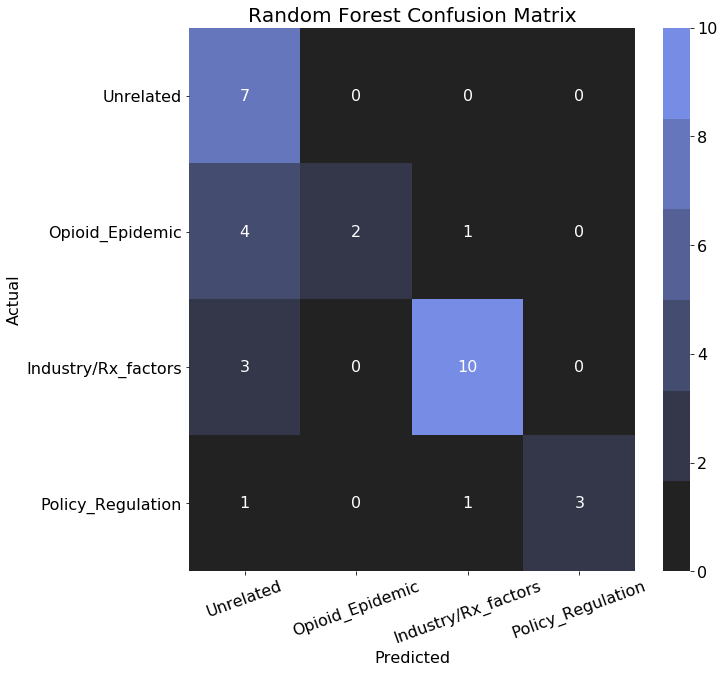

In [47]:
model4 = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)

model4.fit(X_train_vectorized, y_train)
y_pred = model4.predict(vect.transform(X_test))
print('Model Accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100))

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=class_id_df.topic.values, yticklabels=class_id_df.topic.values, cmap = pal)

plt.rcParams.update({'font.size': 16})
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.xticks(rotation=20)
plt.savefig('Forest.png')
plt.title("Random Forest Confusion Matrix", fontsize = 20)
plt.show()

Results and Discussion

Apart from Logistic Regression, all models did a good job of not classifying the industry-related articles as something else. This is probably due to two factors: 1. the industry-pharma articles are the best-represented class (most frequent) in the dataset, and the stories in this class had some uniquely distinguishing keyword features: ‘Purdue Pharma’ and ‘Sackler’, since the lawsuits against the company were prominent in the news during the time that we scraped. In practice, the effort of using hand-coded targets to build a news story classifier could outweigh the benefit; if a news cycle is dominated by one story, the model doesn’t generalize and would probably require frequent, new training sets.

In this one-fold train and test experiment, Linear SVC and Multinomial NB performed very similarly, the difference in overall accuracy was a result of Linear SVC correctly classifying 4 out of 5 policy articles, whereas Multinomial NB was accurate on only 3 of 5. This similarity highlights the utility of a cross-validation approach for assessing model performance, rather than relying on just one cycle. Linear SVC should be regarded as the best model in the context of this study, since it had the highest median accuracy and narrowest overall range in scores, including outliers. However, a larger training and testing set are really needed to draw confident conclusions. 
